<h1 style="text-align:center;">Statistical Analysis Chicago West Nile Virus Part 2:<br>Linear & Logistic Regression</h1>


## Problem statement
In this part, we will move on to a set of analyses on the relationship between the different variables and the mosquito number, as well as the probability of finding West Nile Virus (WNV) at any particular time and location. 

The given mosquito tracking data from 2008 to 2019 is available here: https://www.kaggle.com/datasets/chicago/chicago-west-nile-virus-mosquito-test-results?select=west-nile-virus-wnv-mosquito-test-results.csv.

This notebook is organized in the following sections:

[Part 1 - Basic Analysis](#Part-1---Basic-Analysis)<br>
[Part 2 - Statistical Analysis](#Part-2---Statistical-Analysis)<br>
[Part 3 - Advanced Statistical Analysis](#Part-3---Advanced-Statistical-Analysis)<br>
- [Linear regression](#Linear-regression)<br>
- [Logistic regression](#Logistic-regression)<br>

[Conclusion](#Conclusion)

Let's begin with importing the appropriate libraries.


In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm 
from scipy.stats import pearsonr
import statsmodels.api as sm

Now, let's load the dataset and take a look at it.

In [69]:
df = pd.read_csv("data/mosquito_data_part_2.csv")

In [70]:
df

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.977738,-87.880969,9
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.798211,-87.736925,9
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.987245,-87.689417,9
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.953664,-87.724987,9
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,negative,CULEX RESTUANS,41.657069,-87.546049,9
...,...,...,...,...,...,...,...,...,...,...,...,...
18490,2016,36,3XX W 18TH ST,T043,GRAVID,2016-09-09 00:09:00,4,positive,CULEX PIPIENS,41.857843,-87.635858,9
18491,2007,34,46XX N MILWAUKEE AVE,T003,GRAVID,2007-08-24 00:08:00,19,positive,CULEX PIPIENS,41.965376,-87.758403,8
18492,2016,30,127XX S DOTY AVE,T115,GRAVID,2016-07-27 00:07:00,34,positive,CULEX RESTUANS,41.662395,-87.590176,7
18493,2017,33,20XX N DOMINICK ST,T240B,SENTINEL,2017-08-17 00:08:00,50,positive,CULEX RESTUANS,41.919197,-87.664758,8


It is mentioned that the dataset is cleaned. Still, some sanity checks will be done to ensure everythin g is set up for analysis.

In [71]:
# Check the type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18495 non-null  int64  
 1   Week             18495 non-null  int64  
 2   Address Block    18495 non-null  object 
 3   Trap             18495 non-null  object 
 4   Trap type        18495 non-null  object 
 5   Date             18495 non-null  object 
 6   Mosquito number  18495 non-null  int64  
 7   WNV Present      18495 non-null  object 
 8   Species          18495 non-null  object 
 9   Lat              18495 non-null  float64
 10  Lon              18495 non-null  float64
 11  Month            18495 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 1.7+ MB


- The Year, Week, Mosquito number, Month are formatted as int64. <br>
- The Lat and Lon are formatted as float64. <br>
- There are six columns as object data type including Address Block, Trap, Trap type, Date, WNV Present, and Species. These columns should be manipulated before feeding into the logistic regression modelling. For now, let's keep it as they are and we will modify them when necessary since we are not sure which columns will be kept for modelling.

In [72]:
# Null values check
df.isnull().sum()

Year               0
Week               0
Address Block      0
Trap               0
Trap type          0
Date               0
Mosquito number    0
WNV Present        0
Species            0
Lat                0
Lon                0
Month              0
dtype: int64

Pretty clean! There is no null values. Now let's jump to the questions.

## Part 1 - Basic Analysis


### Converting the WNV Present column into a binary column and create dummy variables from the Trap type column

**Part I:** <u> Converting "WNV Present" into a binary column <u>

Before converting the "WNV Present" into a binary column, let's count the vlaues of positives and negatives. 

In [73]:
df['WNV Present'].value_counts()

WNV Present
negative    14501
positive     3994
Name: count, dtype: int64

In [74]:
# Making a dictionary of binary arialbes for the column "WNV Present"
WNV_Present = {'positive': 1, 'negative': 0}

df['WNV_Present'] = [WNV_Present[item] for item in df['WNV Present']]
df.drop('WNV Present', axis=1, inplace=True)

In [75]:
df

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,Species,Lat,Lon,Month,WNV_Present
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,CULEX RESTUANS,41.977738,-87.880969,9,0
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,CULEX RESTUANS,41.798211,-87.736925,9,0
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,CULEX RESTUANS,41.987245,-87.689417,9,0
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,CULEX RESTUANS,41.953664,-87.724987,9,0
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,CULEX RESTUANS,41.657069,-87.546049,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18490,2016,36,3XX W 18TH ST,T043,GRAVID,2016-09-09 00:09:00,4,CULEX PIPIENS,41.857843,-87.635858,9,1
18491,2007,34,46XX N MILWAUKEE AVE,T003,GRAVID,2007-08-24 00:08:00,19,CULEX PIPIENS,41.965376,-87.758403,8,1
18492,2016,30,127XX S DOTY AVE,T115,GRAVID,2016-07-27 00:07:00,34,CULEX RESTUANS,41.662395,-87.590176,7,1
18493,2017,33,20XX N DOMINICK ST,T240B,SENTINEL,2017-08-17 00:08:00,50,CULEX RESTUANS,41.919197,-87.664758,8,1


In [76]:
# Checking the value counts
df['WNV_Present'].value_counts()

WNV_Present
0    14501
1     3994
Name: count, dtype: int64

The value counts are the same as the ones before converting to binary column. Therefore, the conversion was done correctly.

**Part II:** <u>Creating dummy variables from the Trap type column<u>


First, let's take a look at the "Trap type" column.

In [77]:
# Counting the frequencies of different trap types
df['Trap type'].value_counts()

Trap type
GRAVID      17741
CDC           544
SENTINEL      209
OVI             1
Name: count, dtype: int64

In [78]:
# Getting the rows with "OVI" trap type
df[df['Trap type'] == 'OVI']

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,Species,Lat,Lon,Month,WNV_Present
15392,2007,23,5XX S CENTRAL AVE,T167,OVI,2007-06-29 11:06:17,1,CULEX PIPIENS,41.872873,-87.764737,6,0


**Note:** Since there is only one row with one mosquito trapped, it would be better to first drop this row and then convert the "Trap type" column to the dummy variables. This way, instead of three columns of dummy variables for trap types, we would end up with only two which makes the final model simpler with less features.

In [79]:
# Dropping the rows with "OVI" trap type
df.drop(df[df['Trap type'] == 'OVI'].index, inplace=True)
df

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,Species,Lat,Lon,Month,WNV_Present
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,CULEX RESTUANS,41.977738,-87.880969,9,0
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,CULEX RESTUANS,41.798211,-87.736925,9,0
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,CULEX RESTUANS,41.987245,-87.689417,9,0
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,CULEX RESTUANS,41.953664,-87.724987,9,0
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,CULEX RESTUANS,41.657069,-87.546049,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18490,2016,36,3XX W 18TH ST,T043,GRAVID,2016-09-09 00:09:00,4,CULEX PIPIENS,41.857843,-87.635858,9,1
18491,2007,34,46XX N MILWAUKEE AVE,T003,GRAVID,2007-08-24 00:08:00,19,CULEX PIPIENS,41.965376,-87.758403,8,1
18492,2016,30,127XX S DOTY AVE,T115,GRAVID,2016-07-27 00:07:00,34,CULEX RESTUANS,41.662395,-87.590176,7,1
18493,2017,33,20XX N DOMINICK ST,T240B,SENTINEL,2017-08-17 00:08:00,50,CULEX RESTUANS,41.919197,-87.664758,8,1


In [80]:
# Check again the value counts of the Trap type column
df['Trap type'].value_counts()

Trap type
GRAVID      17741
CDC           544
SENTINEL      209
Name: count, dtype: int64

It looks good now. The trap type could be converted into the dummy variables. After that, one column will be dropped. In this case, the **SENTINEL** will be selected since this category has the lowest number of observations.

In [81]:
# Creating dummy variables from Trap type
dummy_Trap_type = pd.get_dummies(df['Trap type'])
# Dropping SENTINEL column
dummy_Trap_type.drop('SENTINEL', axis=1, inplace=True)
# Converting boolean values to integers
dummy_Trap_type = dummy_Trap_type.astype(int)
dummy_Trap_type

,CDC,GRAVID
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
18490,0,1
18491,0,1
18492,0,1
18493,0,0


In [82]:
# Merging two dataframes
df = pd.concat([df, dummy_Trap_type], axis=1)

In [83]:
# Dropping the Trap type column
df.drop(columns = 'Trap type', inplace=True)

In [84]:
# Check
df

,Year,Week,Address Block,Trap,Date,Mosquito number,Species,Lat,Lon,Month,WNV_Present,CDC,GRAVID
0,2019,39,100XX W OHARE AIRPORT,T910,2019-09-26 00:09:00,2,CULEX RESTUANS,41.977738,-87.880969,9,0,0,1
1,2019,39,52XX S KOLMAR AVE,T114,2019-09-26 00:09:00,1,CULEX RESTUANS,41.798211,-87.736925,9,0,0,1
2,2019,39,58XX N WESTERN AVE,T028,2019-09-26 00:09:00,2,CULEX RESTUANS,41.987245,-87.689417,9,0,0,1
3,2019,39,39XX N SPRINGFIELD AVE,T228,2019-09-26 00:09:00,1,CULEX RESTUANS,41.953664,-87.724987,9,0,0,1
4,2019,39,131XX S BRANDON AVE,T209,2019-09-26 00:09:00,9,CULEX RESTUANS,41.657069,-87.546049,9,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18490,2016,36,3XX W 18TH ST,T043,2016-09-09 00:09:00,4,CULEX PIPIENS,41.857843,-87.635858,9,1,0,1
18491,2007,34,46XX N MILWAUKEE AVE,T003,2007-08-24 00:08:00,19,CULEX PIPIENS,41.965376,-87.758403,8,1,0,1
18492,2016,30,127XX S DOTY AVE,T115,2016-07-27 00:07:00,34,CULEX RESTUANS,41.662395,-87.590176,7,1,0,1
18493,2017,33,20XX N DOMINICK ST,T240B,2017-08-17 00:08:00,50,CULEX RESTUANS,41.919197,-87.664758,8,1,0,0


The **WNV_present** column is now binary and the **Trap type** is converted into two dummy variables columns.

### The average number of mosquitoes for each month

In [85]:
df.groupby('Month')['Mosquito number'].sum()

Month
5       116
6     28606
7     59007
8     83229
9     29055
10     1210
Name: Mosquito number, dtype: int64

In [86]:
mos_number_per_month = df.groupby([df['Year'], df['Month']])['Mosquito number'].sum()
pd.DataFrame(mos_number_per_month.unstack().mean(axis=0), columns=['Avg number of mosquitoes'])

,Avg number of mosquitoes
Month,
5,58.000000
6,2200.461538
7,4539.000000
8,6402.230769
9,2235.000000
10,302.500000


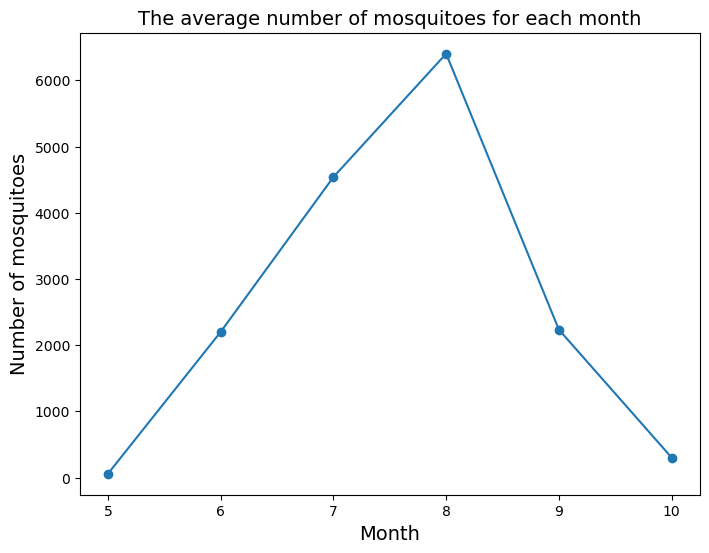

In [87]:
# Plotting the average number of mosquitoes for each month
plt.figure(figsize=(8,6))
mos_number_per_month.unstack().mean(axis=0).plot(marker='o')
plt.xlabel("Month", fontsize=14)
plt.ylabel("Number of mosquitoes", fontsize=14)
plt.title("The average number of mosquitoes for each month", fontsize=14)
plt.show()

As can be seen in this figure, August and July are the months with the highest record of mosquito numbers following by June and September. Therefore, it can be observed that there is a seasonality with highest peak in August and July.

## Part 2 - Statistical Analysis

### Is there a statistically significant difference between the different mosquito species when looking at the occurrence of West Nile Virus?

TO check if there is any difference between the different mosquito species and the occurrence of West Nile Virus (negative or positive), the **Chi Squared test** will be used.

For a Chi-Squared test for independence, our hypotheses are:

$H_0$: There is no difference between the mosquito species and the occurrence of West Nile Virus. (They are independent.)

$H_1$: There is _some_ difference between the mosquito species and the occurrence of West Nile Virus. (They are not independent.)

Let's create our dataframe.

In [88]:
# Creating the dataframe for Chi Squared test
df_species = df.groupby(['Species', 'WNV_Present'])['Species'].count()
df_species = df_species.unstack().T
df_species

Species,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
WNV_Present,,,,
0,4073,9309,215,903
1,1412,2557,11,14


We have the contingency table, and we can run our Chi Squared test by passing this table into the `chi2_contingency()` function:

In [89]:
stats.chi2_contingency(df_species)

Chi2ContingencyResult(statistic=311.2076370227429, pvalue=3.7322806289856336e-67, dof=3, expected_freq=array([[4300.4487942 , 9303.3956959 ,  177.19260301,  718.96290689],
       [1184.5512058 , 2562.6043041 ,   48.80739699,  198.03709311]]))

As can be seen, the p-value is really low (3.7322806289856336e-67) meaning that we can reject our null hypothesis meaning that there is some difference between the mosquito species and the occurrence of West Nile Virus. 

From the expected values, it can be observed that the main difference between the expected values and observed are coming from these two species: CULEX SALINARIUS and CULEX TERRITANS

This can be confirmed from our previous findings (in deliverable 1) where the percentage of the species with WNV positive was calculated:

In [90]:
pct_species_positive = df.groupby(['Species', 'WNV_Present'])['Species'].count() / df.groupby('Species')['Species'].count()
pct_species_positive.unstack().T

Species,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
WNV_Present,,,,
0,0.742571,0.78451,0.951327,0.984733
1,0.257429,0.21549,0.048673,0.015267


It can be seen while the the percentage of the species with WNV negative is between 21 and 25 percent for CULEX PIPIENS	and CULEX RESTUANS, this value is between 0.01 and 0.04 for CULEX TERRITANS and CULEX SALINARIUS. This assumes that there is a meaningful difference betrween the species which was confirmed by the `Chi Squared test`.

### Which columns are positively correlated with the number of mosquitoes caught? Which columns are negatively correlated? Are these correlations statistically significant?

Let's take a look again to the dataframe.

In [91]:
df.head()

,Year,Week,Address Block,Trap,Date,Mosquito number,Species,Lat,Lon,Month,WNV_Present,CDC,GRAVID
0,2019,39,100XX W OHARE AIRPORT,T910,2019-09-26 00:09:00,2,CULEX RESTUANS,41.977738,-87.880969,9,0,0,1
1,2019,39,52XX S KOLMAR AVE,T114,2019-09-26 00:09:00,1,CULEX RESTUANS,41.798211,-87.736925,9,0,0,1
2,2019,39,58XX N WESTERN AVE,T028,2019-09-26 00:09:00,2,CULEX RESTUANS,41.987245,-87.689417,9,0,0,1
3,2019,39,39XX N SPRINGFIELD AVE,T228,2019-09-26 00:09:00,1,CULEX RESTUANS,41.953664,-87.724987,9,0,0,1
4,2019,39,131XX S BRANDON AVE,T209,2019-09-26 00:09:00,9,CULEX RESTUANS,41.657069,-87.546049,9,0,0,1


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18494 entries, 0 to 18494
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18494 non-null  int64  
 1   Week             18494 non-null  int64  
 2   Address Block    18494 non-null  object 
 3   Trap             18494 non-null  object 
 4   Date             18494 non-null  object 
 5   Mosquito number  18494 non-null  int64  
 6   Species          18494 non-null  object 
 7   Lat              18494 non-null  float64
 8   Lon              18494 non-null  float64
 9   Month            18494 non-null  int64  
 10  WNV_Present      18494 non-null  int64  
 11  CDC              18494 non-null  int32  
 12  GRAVID           18494 non-null  int32  
dtypes: float64(2), int32(2), int64(5), object(4)
memory usage: 1.8+ MB


Still, there are four object type columns including **Address Block, Trap, Date**. For the Date, there are columns of Year, Month and Week. So, the Date column can be dropped.

Let's count values of the columns Address Block and Trap.

In [93]:
df['Address Block'].value_counts()

Address Block
100XX W OHARE AIRPORT       2039
41XX N OAK PARK AVE          408
101XX S STONY ISLAND AVE     369
52XX S KOLMAR AVE            349
1XX N CENTRAL PARK DR        335
                            ... 
29XX N KENNETH AVE             2
54XX W PARKER AVE              1
4XX W 127TH ST                 1
104XX S OGLESBY AVE            1
21XX S HAMLIN AVE              1
Name: count, Length: 154, dtype: int64

In [94]:
df['Trap'].value_counts()

Trap
T002     406
T114     340
T031     333
T008     326
T138     304
        ... 
T009B      2
T241       1
T135B      1
T128A      1
T040       1
Name: count, Length: 189, dtype: int64

Since there are 154 and 189 unique addresses and traps, respectively, there is no way to convert these columns to numerical ones such as dummy variables. Therefore, all three columns of **Address Block, Trap, Date** will be dropped.

In [95]:
# Dropping the Address Block, Trap, Date columns 
df.drop(columns=['Address Block', 'Trap', 'Date'], inplace=True)
df.head()

,Year,Week,Mosquito number,Species,Lat,Lon,Month,WNV_Present,CDC,GRAVID
0,2019,39,2,CULEX RESTUANS,41.977738,-87.880969,9,0,0,1
1,2019,39,1,CULEX RESTUANS,41.798211,-87.736925,9,0,0,1
2,2019,39,2,CULEX RESTUANS,41.987245,-87.689417,9,0,0,1
3,2019,39,1,CULEX RESTUANS,41.953664,-87.724987,9,0,0,1
4,2019,39,9,CULEX RESTUANS,41.657069,-87.546049,9,0,0,1


In [96]:
# Check
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18494 entries, 0 to 18494
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18494 non-null  int64  
 1   Week             18494 non-null  int64  
 2   Mosquito number  18494 non-null  int64  
 3   Species          18494 non-null  object 
 4   Lat              18494 non-null  float64
 5   Lon              18494 non-null  float64
 6   Month            18494 non-null  int64  
 7   WNV_Present      18494 non-null  int64  
 8   CDC              18494 non-null  int32  
 9   GRAVID           18494 non-null  int32  
dtypes: float64(2), int32(2), int64(5), object(1)
memory usage: 1.4+ MB


There is only one column left of object type: **Species**

Let's see the value counts for this column first.

In [97]:
df['Species'].value_counts()

Species
CULEX RESTUANS      11866
CULEX PIPIENS        5485
CULEX TERRITANS       917
CULEX SALINARIUS      226
Name: count, dtype: int64

As **Species** is the only column left of object type with 4 categories. It will be converted to the dummy variables and the column **CULEX SALINARIUS** will be dropped after that to eliminate the multicollinearity.

In [98]:
# Convert Species column to dummy variables
df = pd.get_dummies(df)
df.head()

,Year,Week,Mosquito number,Lat,Lon,Month,WNV_Present,CDC,GRAVID,Species_CULEX PIPIENS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TERRITANS
0,2019,39,2,41.977738,-87.880969,9,0,0,1,False,True,False,False
1,2019,39,1,41.798211,-87.736925,9,0,0,1,False,True,False,False
2,2019,39,2,41.987245,-87.689417,9,0,0,1,False,True,False,False
3,2019,39,1,41.953664,-87.724987,9,0,0,1,False,True,False,False
4,2019,39,9,41.657069,-87.546049,9,0,0,1,False,True,False,False


In [99]:
# Dropping the CULEX SALINARIUS column
df.drop('Species_CULEX SALINARIUS', axis=1, inplace=True)

In [100]:
# Check
df.head()

,Year,Week,Mosquito number,Lat,Lon,Month,WNV_Present,CDC,GRAVID,Species_CULEX PIPIENS,Species_CULEX RESTUANS,Species_CULEX TERRITANS
0,2019,39,2,41.977738,-87.880969,9,0,0,1,False,True,False
1,2019,39,1,41.798211,-87.736925,9,0,0,1,False,True,False
2,2019,39,2,41.987245,-87.689417,9,0,0,1,False,True,False
3,2019,39,1,41.953664,-87.724987,9,0,0,1,False,True,False
4,2019,39,9,41.657069,-87.546049,9,0,0,1,False,True,False


In [101]:
# Dummy variable columns 
dummy_columns = ['Species_CULEX PIPIENS', 'Species_CULEX RESTUANS', 'Species_CULEX TERRITANS']

# Convert only dummy variable columns to integers
df[dummy_columns] = df[dummy_columns].astype(int)
df.head()

,Year,Week,Mosquito number,Lat,Lon,Month,WNV_Present,CDC,GRAVID,Species_CULEX PIPIENS,Species_CULEX RESTUANS,Species_CULEX TERRITANS
0,2019,39,2,41.977738,-87.880969,9,0,0,1,0,1,0
1,2019,39,1,41.798211,-87.736925,9,0,0,1,0,1,0
2,2019,39,2,41.987245,-87.689417,9,0,0,1,0,1,0
3,2019,39,1,41.953664,-87.724987,9,0,0,1,0,1,0
4,2019,39,9,41.657069,-87.546049,9,0,0,1,0,1,0


In [102]:
# Reordring columns
df = df[['Year', 'Month', 'Week', 'Lat', 'Lon', 'CDC', 'GRAVID', 'Species_CULEX PIPIENS', 'Species_CULEX RESTUANS',
        'Species_CULEX TERRITANS', 'WNV_Present', 'Mosquito number']]
# Renaming some columns
df.columns= ['Year', 'Month', 'Week', 'Lat', 'Lon', 'Trap_CDC', 'Trap_GRAVID', 'Species_CULEX PIPIENS',
             'Species_CULEX RESTUANS', 'Species_CULEX TERRITANS', 'WNV_Present', 'Mosquito_number']

In [103]:
# Check
df.head()

,Year,Month,Week,Lat,Lon,Trap_CDC,Trap_GRAVID,Species_CULEX PIPIENS,Species_CULEX RESTUANS,Species_CULEX TERRITANS,WNV_Present,Mosquito_number
0,2019,9,39,41.977738,-87.880969,0,1,0,1,0,0,2
1,2019,9,39,41.798211,-87.736925,0,1,0,1,0,0,1
2,2019,9,39,41.987245,-87.689417,0,1,0,1,0,0,2
3,2019,9,39,41.953664,-87.724987,0,1,0,1,0,0,1
4,2019,9,39,41.657069,-87.546049,0,1,0,1,0,0,9


Now all the columns are converted to the proper format and everything is ready for calculating correlation values and later modelling.

For seeing the correlation of columns with the number of mosquitoes caught, the **Mosquito_number** will be put as the target to the following function to calculate the correlations and the statistical significance.

In [104]:
def pearson_df(dataframe, target, alpha=0.05):
    '''
    This function takes a dataframe with a column of interest (target), a significance threshold (alpha) as inputs. It 
    then calculates the correlation coefficients and p-values using scipy.stats.pearsonr(),
    and returns a dataframe of the results
    
    Parameters:
    -----------
    dataframe: a pandas dataframe containing the data to compare
    target: a string specifying one of the columns in the dataframe to compare to the rest of the data
    alpha: a significance threshold for evaluating p-values (default 0.05)
    
    Returns:
    --------
    output: a dataframe containing correlation coefficients and p-values for each variable in dataframe
    w.r.t. the target variable
    
    '''
    
    # Validate the inputs
    assert isinstance(dataframe, pd.DataFrame), 'dataframe must be a pandas DataFrame'
    assert isinstance(target, str), 'target must be a string'
    assert isinstance(alpha, float), 'alpha must be a float'
    assert(0 <= alpha <= 1), 'alpha must be between 0 and 1'
    
    # Instantiating empty lists
    variable_names = []
    corr_list = []
    p_value_list = []
    
    # Looping across all of the columns in the dataframe
    for column in range(dataframe.shape[1]):
        
        # Calculating the coefficient and p-value for each column w.r.t. the target variable
        corr, p_value = pearsonr(dataframe.iloc[:, column], dataframe[target])
        
        # Add the column name, coefficient, and p-value to their respective lists
        variable_names.append(dataframe.columns[column])
        corr_list.append(corr)
        p_value_list.append(p_value)

    # Turn the three lists into a dataframe for easier viewing
    output = pd.DataFrame(index=variable_names, data={'coefficient': corr_list, 'p-value': p_value_list})
    
    # Add a column which states whether the correlation is significant
    output[f'p-value <= {alpha}'] = np.where(output['p-value'] <= alpha, True, False)
    
    # Drop the target variable from the dataframe
    output = output.drop(target)
    
    print(f'Correlations between data columns and {target}:')
    
    return output

In [105]:
# Calculating and showing the correlations and the statistical significance
correlation_df = pearson_df(df, 'Mosquito_number')
correlation_df.sort_values('coefficient', ascending=False)

Correlations between data columns and Mosquito_number:


,coefficient,p-value,p-value <= 0.05
WNV_Present,0.408023,0.000000e+00,True
Year,0.129274,9.613408e-70,True
Lat,0.096828,9.000698e-40,True
Trap_CDC,0.094142,1.110831e-37,True
Species_CULEX RESTUANS,0.070951,4.445891e-22,True
Species_CULEX PIPIENS,0.014792,4.425748e-02,True
Week,-0.033976,3.808377e-06,True
Month,-0.040495,3.611836e-08,True
Trap_GRAVID,-0.138557,6.112528e-80,True
Species_CULEX TERRITANS,-0.150973,1.010195e-94,True


As it is indicated in the table above, all the correlations between independent variables and the number of mosquitoes caught are significant (p-values are below 0.05). The p-value of Species_CULEX PIPIENS (4.425748e-02) is close to 0.05 and will be considered for the next steps of modelling part. 

Between the independent variables, these have positive correlation with number of mosquitoes caught:
- WNV_Present
- Year
- Lat
- Trap_CDC
- Species_CULEX RESTUANS	
- Species_CULEX PIPIENS	
The WNV_Present has the highest correlation with the value 0.408023 and lowest p-value. Other ones do not have that much correlation with the dependent variable.

These independent variables have negative correlation with number of mosquitoes caught: 
- Week
- Month
- Trap_GRAVID
- Species_CULEX TERRITANS
- Lon

Between the independent variables and number of mosquitoes caught not much negative correlation can be observed. 

From both positive and negative correlations it can be observed that Trap_CDC and Trap_GRAVID have opposite correlations with dependent variable. This makes sense since most of the mosquitoes have been caught with the Trap_GRAVID type. Also, Lat and Lon have opposite correlations with the number of mosquitoes caught. The correlations between each of these independent variables will be studied later i the modelling part.

# Part 3 - Advanced Statistical Analysis


### Linear regression to determine how the independent variables affect the number of mosquitoes caught

First, the **WNV Present** will be dropped.    

In [106]:
# Dropping the WNV Present column
df_reg = df.drop('WNV_Present', axis=1)

In [107]:
# Check
df_reg.head()

,Year,Month,Week,Lat,Lon,Trap_CDC,Trap_GRAVID,Species_CULEX PIPIENS,Species_CULEX RESTUANS,Species_CULEX TERRITANS,Mosquito_number
0,2019,9,39,41.977738,-87.880969,0,1,0,1,0,2
1,2019,9,39,41.798211,-87.736925,0,1,0,1,0,1
2,2019,9,39,41.987245,-87.689417,0,1,0,1,0,2
3,2019,9,39,41.953664,-87.724987,0,1,0,1,0,1
4,2019,9,39,41.657069,-87.546049,0,1,0,1,0,9


We will assign the columns to independent and dependent variables.

In [108]:
# Assigning X and y
X = df_reg.drop('Mosquito_number', axis=1)
y = df_reg['Mosquito_number']

In [109]:
# Check
X.head()

,Year,Month,Week,Lat,Lon,Trap_CDC,Trap_GRAVID,Species_CULEX PIPIENS,Species_CULEX RESTUANS,Species_CULEX TERRITANS
0,2019,9,39,41.977738,-87.880969,0,1,0,1,0
1,2019,9,39,41.798211,-87.736925,0,1,0,1,0
2,2019,9,39,41.987245,-87.689417,0,1,0,1,0
3,2019,9,39,41.953664,-87.724987,0,1,0,1,0
4,2019,9,39,41.657069,-87.546049,0,1,0,1,0


In [110]:
# Check
y.head()

0    2
1    1
2    2
3    1
4    9
Name: Mosquito_number, dtype: int64

There are four assumptions to be considered for linear regression model:

1. **Linearity**: The relationship between the predictor and target variables to be linear.
2. **Independence/No Multicollinearity**: The predictor variables are independent of each other.
3. **Residuals** are normally distributed.**
4. **Homoscedasticity**: The variance of residual is the same for any value of X.**


**3.1.1. Linearity**

One of the assumptions when building a linear regression model is that there is a linear relationship between the predictor variables and the target variable. Let's plot the relationship between X and y.


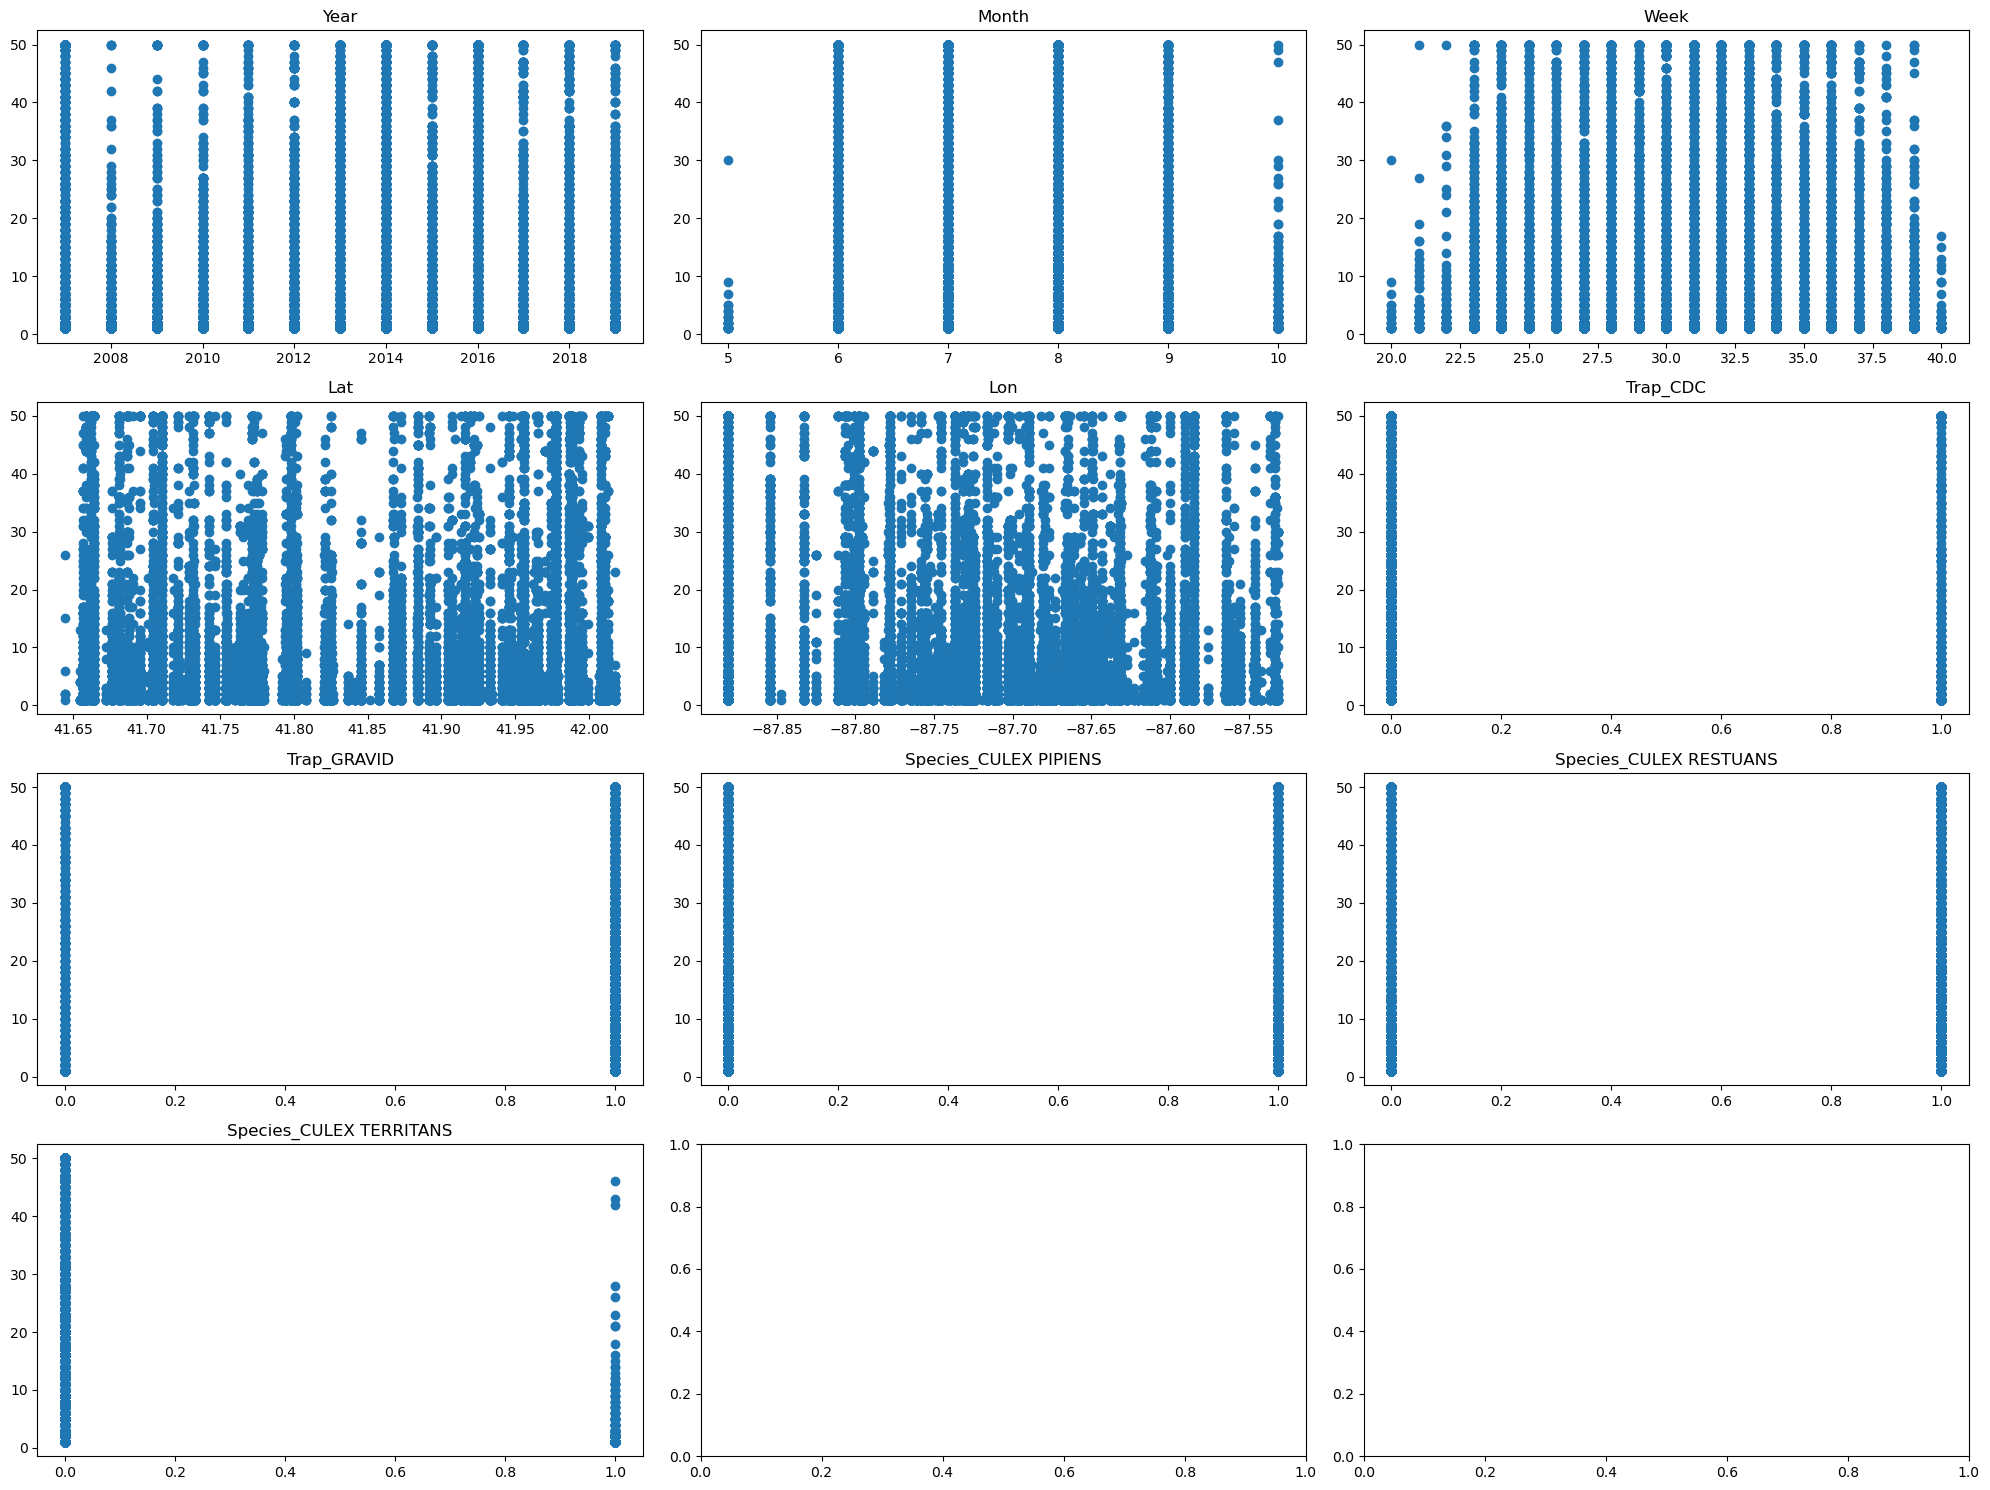

In [111]:
plt.subplots(4,3, figsize=(20,15))

count = 1

for col in X.columns:
    plt.subplot(4,3,count)
    plt.scatter(X[col],y)
    plt.title(col)
    
    count += 1
    
plt.tight_layout()
plt.show()

Since most of the variables are discrete values, it is hard to see any linearity here. Let'e keep the variable as is and check the other assumptions.

**3.1.2. Independence/No Multicollinearity**

Another important assumption when building a linear regression is that there is no collinearity: the predictor variables are independent of each other.

We can use corr() to display a correlation matrix of the dataset:

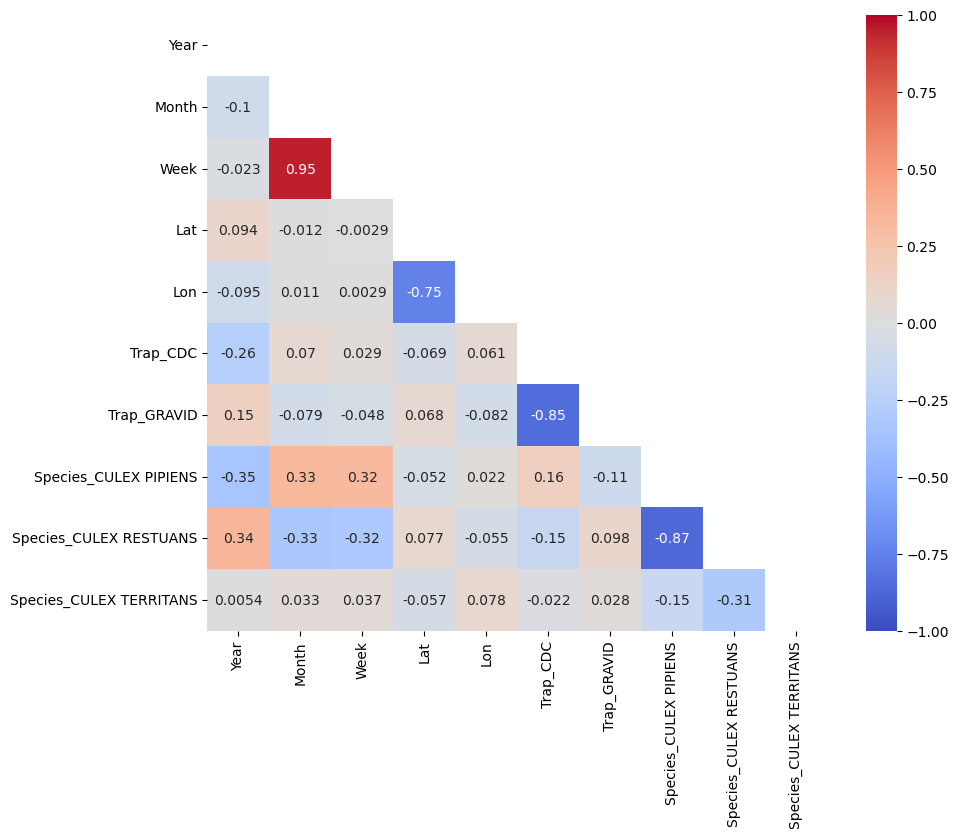

In [112]:
mask = np.triu(np.ones_like(X.corr(), dtype=bool))

plt.figure(figsize=(10,8))
sns.heatmap(X.corr(), annot=True, mask=mask, cmap='coolwarm',vmin=-1, vmax=1, center=0)
plt.show()

From this, we can see that **Week** and **Month** are strongly correlated (0.95) to each other. So, one of them should be removed.

Let's check each of them.

In [113]:
X['Week'].value_counts()

Week
32    1662
31    1596
33    1595
30    1442
34    1300
29    1277
28    1223
35    1113
36     972
27     946
37     840
24     802
26     792
25     791
38     664
23     602
39     594
22     129
21      78
40      47
20      29
Name: count, dtype: int64

In [114]:
X['Month'].value_counts()

Month
8     6872
7     5108
9     3461
6     2786
10     225
5       42
Name: count, dtype: int64

It seems that there is more variation in the **Week** column. Therefore we will opt to keep this and remove the **Month** column. 

But Before dropping any column, let's try to build a regression model based on all features to have a comparison for later on.

In [115]:
# Adding the constant
X_const1 = sm.add_constant(X)

In [116]:
# Instantiate
Mosquito_model_base = sm.OLS(y, X_const1)

# Fit
results_base = Mosquito_model_base.fit()

# Check
results_base.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito_number   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     188.4
Date:                Mon, 20 May 2024   Prob (F-statistic):               0.00
Time:                        20:30:18   Log-Likelihood:                -73444.
No. Observations:               18494   AIC:                         1.469e+05
Df Residuals:                   18483   BIC:                         1.470e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -3000.3279    111.420    -26.928      0.000   -3218.721   -2781.934
Year                        0.5333      0.029     18.425      0.000       0.477       0.590
Month                      -0.3356      0.311     -1.080      0.280      -0.945       0.273
Week                       -0.0762      0.072     -1.065      0.287      -0.216       0.064
Lat                        -4.8662      1.239     -3.928      0.000      -7.294      -2.438
Lon                       -24.5167      1.503    -16.314      0.000     -27.462     -21.571
Trap_CDC                   -2.0630      1.083     -1.905      0.057      -4.186       0.060
Trap_GRAVID               -13.0565      0.905    -14.427      0.000     -14.830     -11.283
Species_CULEX PIPIENS       9.7623      0.874     11.172      0.000       8.050      11.475
Species_CULEX RESTUANS      8.5056      0.867      9.805      0.000       6.805      10.206
Species_CULEX TERRITANS     0.4680      0.958      0.489      0.625      -1.409       2.345
==============================================================================
Omnibus:                     4534.341   Durbin-Watson:                   1.551
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8984.811
Skew:                           1.504   Prob(JB):                         0.00
Kurtosis:                       4.617   Cond. No.                     2.38e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The R-squared value for the base model is : 0.092. 

Let's get back to the feature selection process. As it was mentioned, the `Month` column will be dropped.

In [117]:
X.drop('Month', axis=1, inplace=True)

Let's check again the correlations.

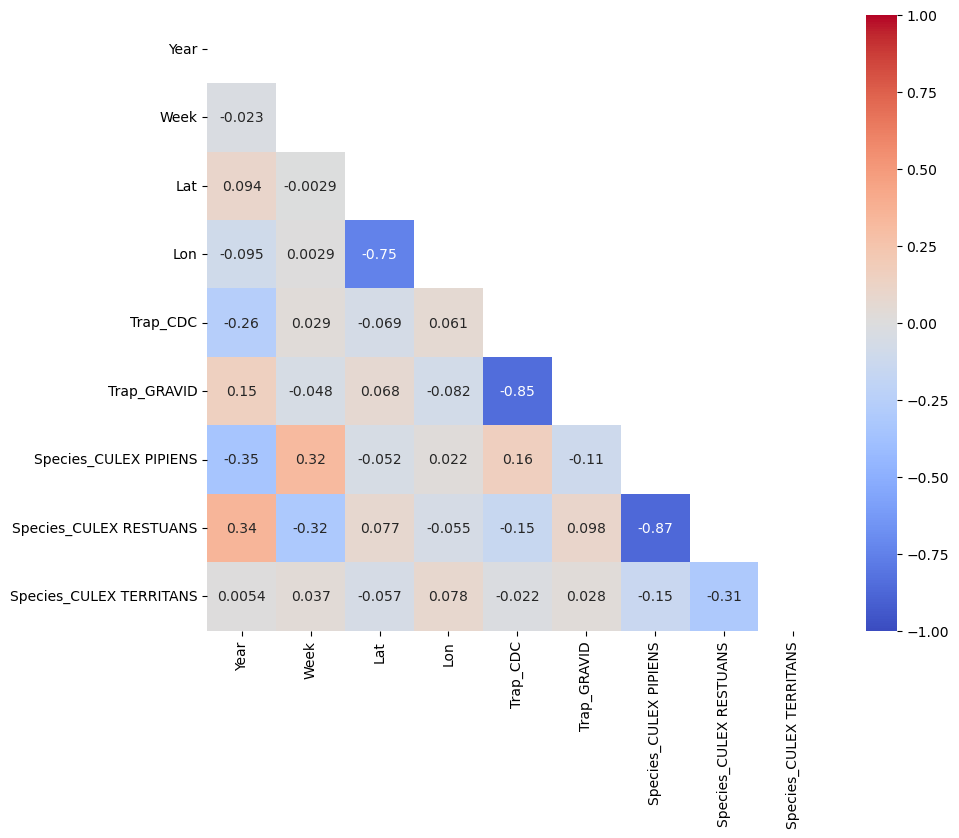

In [118]:
mask = np.triu(np.ones_like(X.corr(), dtype=bool))

plt.figure(figsize=(10,8))
sns.heatmap(X.corr(), annot=True, mask=mask, cmap='coolwarm',vmin=-1, vmax=1, center=0)
plt.show()

Next, we can see that `Species_CULEX PIPIENS` and `Species_CULEX RESTUANS` have high correlation (-0.87). Therefore, after checking them one of them should be dropped.

In [119]:
# Checking the information they hold
X[['Species_CULEX PIPIENS', 'Species_CULEX RESTUANS']].sum()

Species_CULEX PIPIENS      5485
Species_CULEX RESTUANS    11866
dtype: int64

As can be seen, there is more variation in the `Species_CULEX RESTUANS` column. Therefore I will keep this and remove the `Species_CULEX PIPIENS` column.

In [120]:
X.drop('Species_CULEX PIPIENS', axis=1, inplace=True)

Next, we can see that `Trap_CDC` and `Trap_GRAVID` have high correlation (-0.85). Therefore, after checking them one of them should be dropped.

In [121]:
# Checking the information they hold
X[['Trap_CDC', 'Trap_GRAVID']].sum()

Trap_CDC         544
Trap_GRAVID    17741
dtype: int64

As can be seen, there is more variation in the `Trap_GRAVID` column. Therefore I will keep this and remove the `Trap_CDC` column.

In [122]:
X.drop('Trap_CDC', axis=1, inplace=True)

Let's check again the correlations.

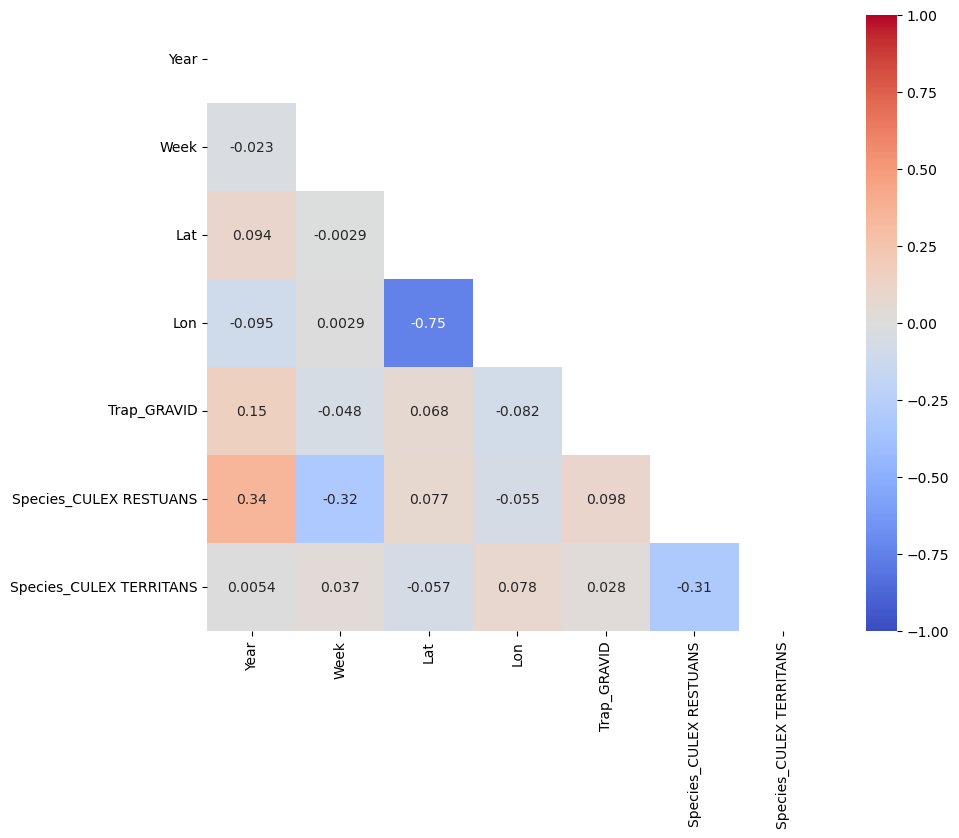

In [123]:
mask = np.triu(np.ones_like(X.corr(), dtype=bool))

plt.figure(figsize=(10,8))
sns.heatmap(X.corr(), annot=True, mask=mask, cmap='coolwarm',vmin=-1, vmax=1, center=0)
plt.show()

Finally, it can be seen that `Lat` and `Lon` have also high correlation (-0.75). Therefore, after checking them one of them will be dropped.

In [124]:
# Checking the information they hold
X['Lat'].value_counts()

Lat
41.977738    2265
41.664336     301
41.956299     292
41.872873     271
41.798211     269
             ... 
41.742671       1
41.771200       1
41.867601       1
41.994972       1
41.919197       1
Name: count, Length: 2509, dtype: int64

In [125]:
X['Lon'].value_counts()

Lon
-87.880969    2265
-87.631956     301
-87.797517     292
-87.764737     271
-87.736925     269
              ... 
-87.731545       1
-87.703101       1
-87.695777       1
-87.770828       1
-87.664758       1
Name: count, Length: 2509, dtype: int64

It seems that there is no difference between these columns. So, I will drop `Lat` and keep `Lon`.

In [126]:
X.drop('Lat', axis=1, inplace=True)

Alright! It seems that we have the selection of independent variables for the regression modelling.

It is mentioned that the VIF analysis is not required. But still, let's check how does our data reacts to this analysis.

In [127]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [128]:
# Adding constant
X_withconst = sm.add_constant(X)

In [129]:
pd.Series([variance_inflation_factor(X_withconst.values, i) 
               for i in range(X_withconst.shape[1])], 
              index=X_withconst.columns)[1:] # leaving out the constant

Year                       1.190546
Week                       1.128869
Lon                        1.020535
Trap_GRAVID                1.035163
Species_CULEX RESTUANS     1.433556
Species_CULEX TERRITANS    1.136244
dtype: float64

Not bad! It seems that there is no multicollinearity between the independent variables. Therefore, with these independent variables, I will proceed to the modelling part.
- Year
- Week
- Lon
- Trap_GRAVID
- Species_CULEX RESTUANS
- Species_CULEX TERRITANS

**Backward Feature Selection**

I have decided to go with Backward Feature Selection method. In backward selection, we fit a model with all data available to us to start, then remove variables based upon whether or not they are significant (and informed by subject matter knowledge), until will reach a model of desired simplicity with sufficient predictive power.

In [130]:
# Adding the constant
X_const = sm.add_constant(X)

In [131]:
# Instantiate
Mosquito_model = sm.OLS(y, X_const)

# Fit
results = Mosquito_model.fit()

# Check
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito_number   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     287.7
Date:                Mon, 20 May 2024   Prob (F-statistic):               0.00
Time:                        20:33:08   Log-Likelihood:                -73516.
No. Observations:               18494   AIC:                         1.470e+05
Df Residuals:                   18487   BIC:                         1.471e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -2828.8215    100.305    -28.202      0.000   -3025.429   -2632.214
Year                        0.5500      0.028     19.814      0.000       0.496       0.604
Week                       -0.1312      0.023     -5.642      0.000      -0.177      -0.086
Lon                       -19.9365      1.004    -19.866      0.000     -21.904     -17.969
Trap_GRAVID               -11.5033      0.488    -23.576      0.000     -12.460     -10.547
Species_CULEX RESTUANS     -0.8362      0.237     -3.534      0.000      -1.300      -0.372
Species_CULEX TERRITANS    -8.9110      0.465    -19.148      0.000      -9.823      -7.999
==============================================================================
Omnibus:                     4544.774   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9006.286
Skew:                           1.508   Prob(JB):                         0.00
Kurtosis:                       4.610   Cond. No.                     2.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As seen in the table above, the performance of the model is very low ($R^2$=0.085). All the predictors seem significant to the model (p-values lower than 0.05). The $R^2$ with all the independent variables fed into the model (before checking the correlations) was obtained as 0.092. Although the performance after feature selection has decreased a bit, the difference is not valuable compared to the complexity of the first model. Therefore, the final model would be selected for analysis of residuals and homoscedasticity.

Also, second note states that the large condition number might indicate that there are strong multicollinearity or other numerical problems despite the fact that efforts were made to prevent this issue.

**3.1.3. Residuals**

- A residual plot can help to visualize whether the error in the model is random or non-random 
- The distribution of the residual values should appear to be normally distributed

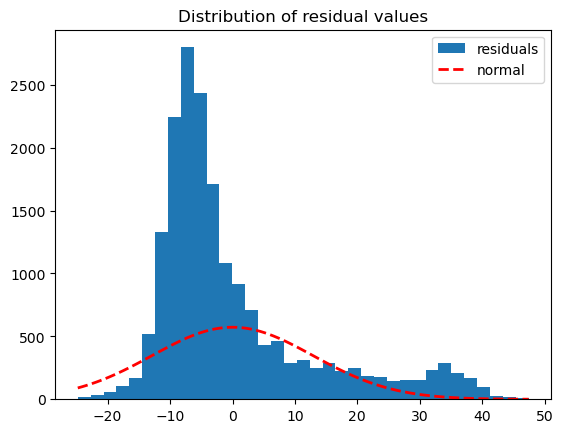

In [132]:
# Plotting the residuals of the model 3.1.2
mean_residuals = results.resid.mean()
std_residuals = results.resid.std()

plt.figure()
plt.hist(results.resid, bins = 35, label='residuals')
plt.title('Distribution of residual values')
x = np.linspace(results.resid.min(), results.resid.max(), 100)
z = stats.norm.pdf(x, loc=mean_residuals, scale=std_residuals)
plt.plot(x, z * len(results.resid), 'r--', linewidth=2, label='normal')
plt.legend()
plt.show()

As can be seen, the error distribution differs substantially from the normal plot. The distribution is right skewed and most of the errors are negative meaning that predictions are mostly lower than the actual values. 

In [133]:
# calculating the shapiro test statisic and its p-value
print("Shapiro-Wilk Test: ", stats.shapiro(results.resid))

Shapiro-Wilk Test:  ShapiroResult(statistic=0.8246262073516846, pvalue=0.0)


c:\Users\majid\miniconda3\envs\timeseries\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


The null hypothesis for the Shapiro-Wilk test is that the data are normally distributed. Because the p-value is less than 0.05, then the null hypothesis that the data are normally distributed is rejected. However, as the warning states, this test is not valid for number of samples greater than 5000.

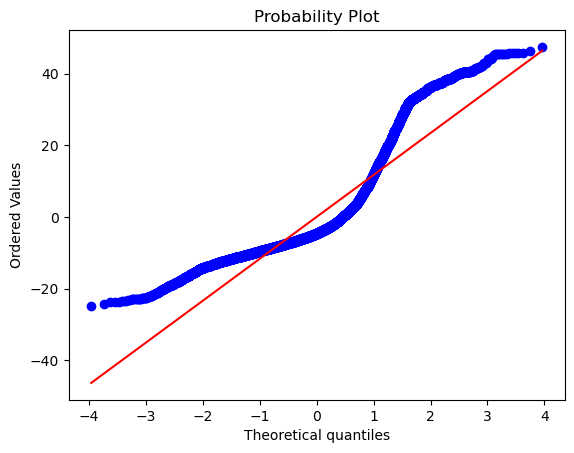

In [134]:
# Normal Q-Q plot
plt.figure()
stats.probplot(results.resid, dist="norm", plot = plt);
plt.show()

Also, from the Q-Q plot it can be observed that the distribution of errors is not normal as the residuals are not fitted on the diagonal line.

**3.1.4. Homoscedasticity**

In the situation of homoscedasticity, the variance of residual is the same.

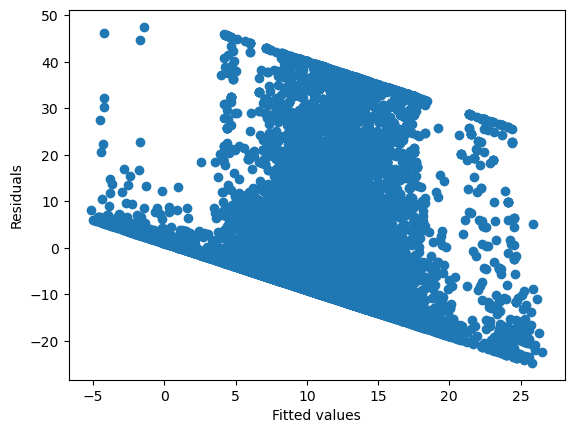

In [135]:
# Plot the residuals and the predicted values
plt.figure()
plt.scatter(results.fittedvalues, results.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

It is hard to interpre this plot as I feel it is somehow subjective. In general, from the analysis of the other plots of the residuals, it can be concluded that the model has not been fitted to the data properly and there are issues regarding the model peformance and residuals. 

### Run a logistic regression to determine how the independent variables affect West Nile Virus presence. 

In [136]:
# Check data
df.head()

,Year,Month,Week,Lat,Lon,Trap_CDC,Trap_GRAVID,Species_CULEX PIPIENS,Species_CULEX RESTUANS,Species_CULEX TERRITANS,WNV_Present,Mosquito_number
0,2019,9,39,41.977738,-87.880969,0,1,0,1,0,0,2
1,2019,9,39,41.798211,-87.736925,0,1,0,1,0,0,1
2,2019,9,39,41.987245,-87.689417,0,1,0,1,0,0,2
3,2019,9,39,41.953664,-87.724987,0,1,0,1,0,0,1
4,2019,9,39,41.657069,-87.546049,0,1,0,1,0,0,9


In [137]:
df.shape[1]

12

First, we will take a look at the data again to check again the distributions.

In [138]:
# The enumerate function returns a counter alongside our data:
list(enumerate(df.columns, start=1))

[(1, 'Year'),
 (2, 'Month'),
 (3, 'Week'),
 (4, 'Lat'),
 (5, 'Lon'),
 (6, 'Trap_CDC'),
 (7, 'Trap_GRAVID'),
 (8, 'Species_CULEX PIPIENS'),
 (9, 'Species_CULEX RESTUANS'),
 (10, 'Species_CULEX TERRITANS'),
 (11, 'WNV_Present'),
 (12, 'Mosquito_number')]

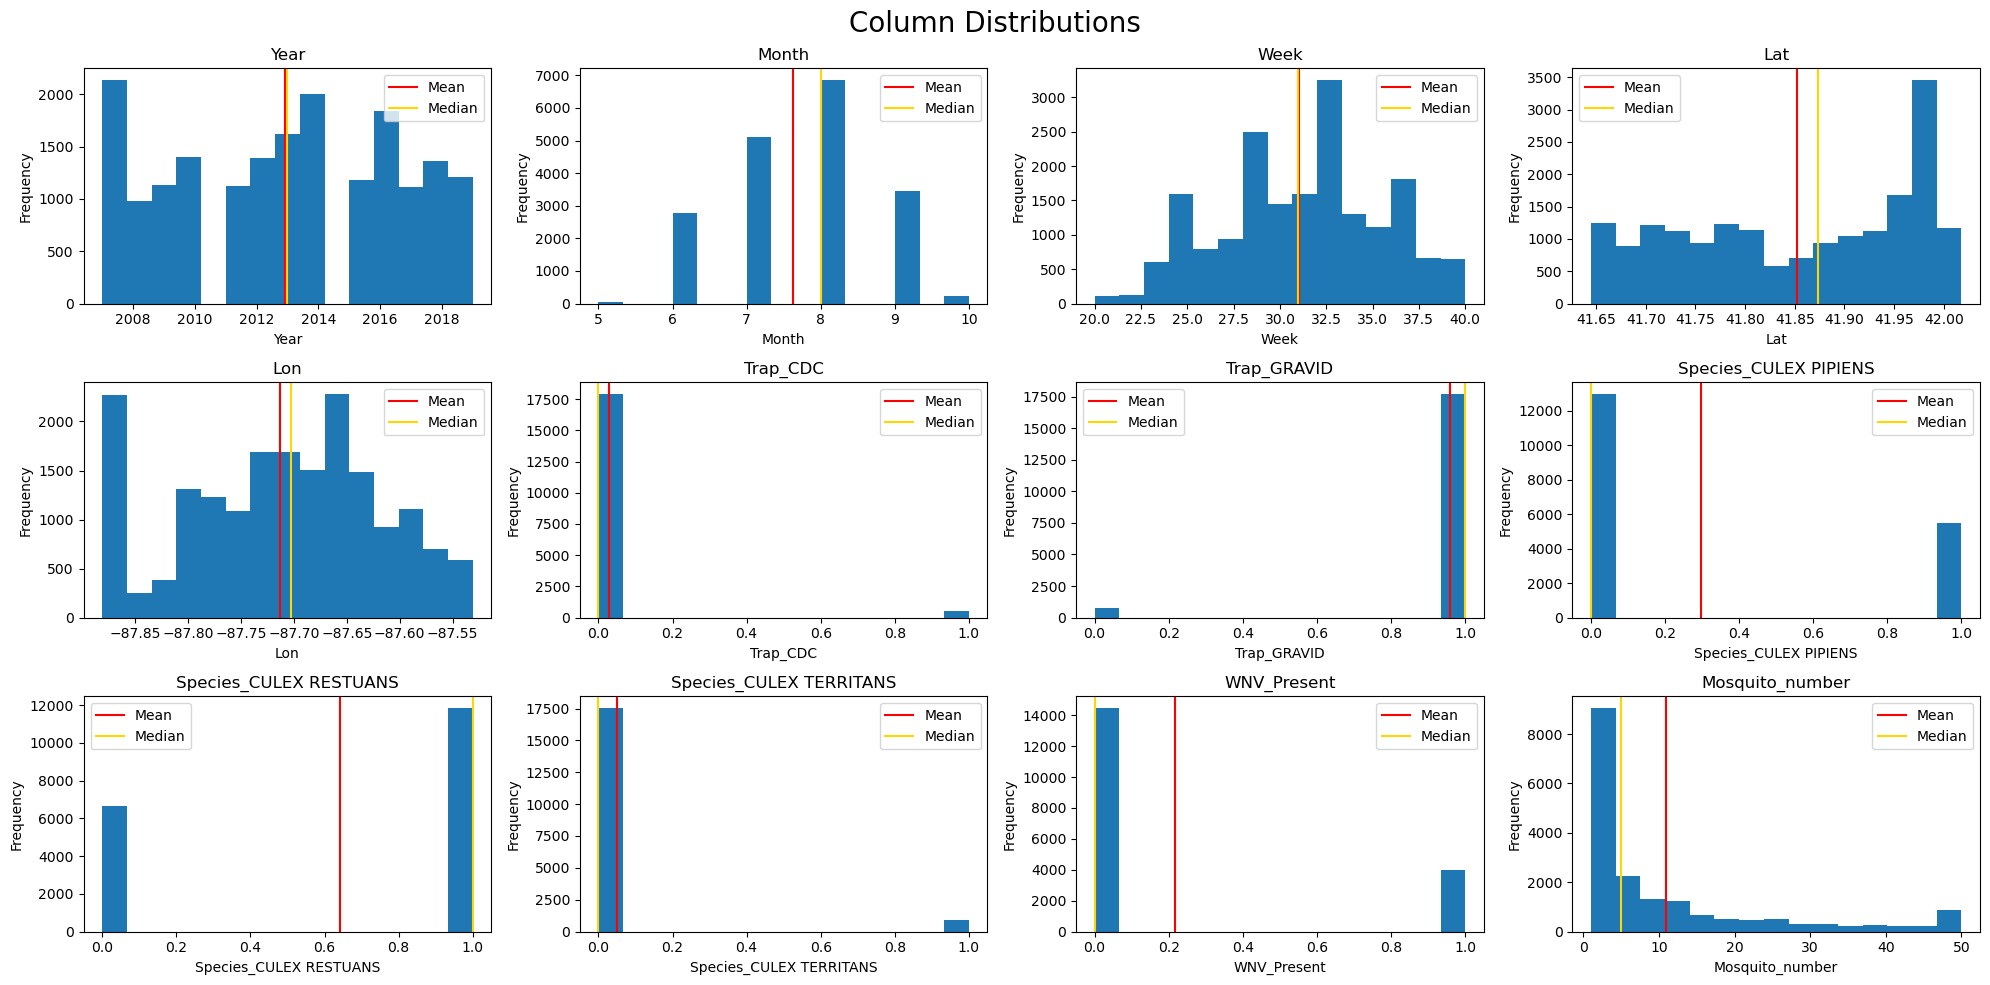

In [139]:
# 3 rows x 4 columns of subplots
plt.subplots(3,4, figsize=(20,10))
plt.suptitle('Column Distributions', size=20)

# Creating the for loop
for slot_num, each_column in enumerate(df.columns, start=1):
    
    # Creating a hist for every iteration
    plt.subplot(3,4,slot_num)
    plt.hist(df[each_column], bins=15)
    
    # Set the titles and labels
    plt.title(each_column)
    plt.xlabel(each_column)
    plt.ylabel('Frequency')
    
    # Adding median and mean lines
    plt.axvline(df[each_column].mean(), c='red', label='Mean')
    plt.axvline(df[each_column].median(), c='gold', label='Median')
    plt.legend()
    
plt.tight_layout()

plt.show()

Some of the plots show some similiraty to normal plots. Also, same findings from the previous analyses can be found here:
- for the Month and Week the miaximum frequencies are in the middle.
- Trap GRAVID is the most frequent trap.
- Mosquito number is skewed to the right.

Also, let's check the average of `WNV_Present`:

In [140]:
df['WNV_Present'].mean()*100

21.59619336000865

This means that ~21.6% the WNV_Present is positive (or 1). This value can give us an insight to check the performance of our final model. This means that if I choose the most naive model, let's say a model that always predict 0 (or negative), my model would have the performance of 78.4% (100 - 21.6). Therefore, whatever the final model, it should be better than this.

**Correlation**

Again, the correlations between the independent variables and independent/dependent variable will be checked.

In [141]:
# Assigning X and y
X = df.drop('WNV_Present', axis=1)
y = df['WNV_Present']

In [142]:
# Check
X.head()

,Year,Month,Week,Lat,Lon,Trap_CDC,Trap_GRAVID,Species_CULEX PIPIENS,Species_CULEX RESTUANS,Species_CULEX TERRITANS,Mosquito_number
0,2019,9,39,41.977738,-87.880969,0,1,0,1,0,2
1,2019,9,39,41.798211,-87.736925,0,1,0,1,0,1
2,2019,9,39,41.987245,-87.689417,0,1,0,1,0,2
3,2019,9,39,41.953664,-87.724987,0,1,0,1,0,1
4,2019,9,39,41.657069,-87.546049,0,1,0,1,0,9


In [143]:
# Check
y.head()

0    0
1    0
2    0
3    0
4    0
Name: WNV_Present, dtype: int64

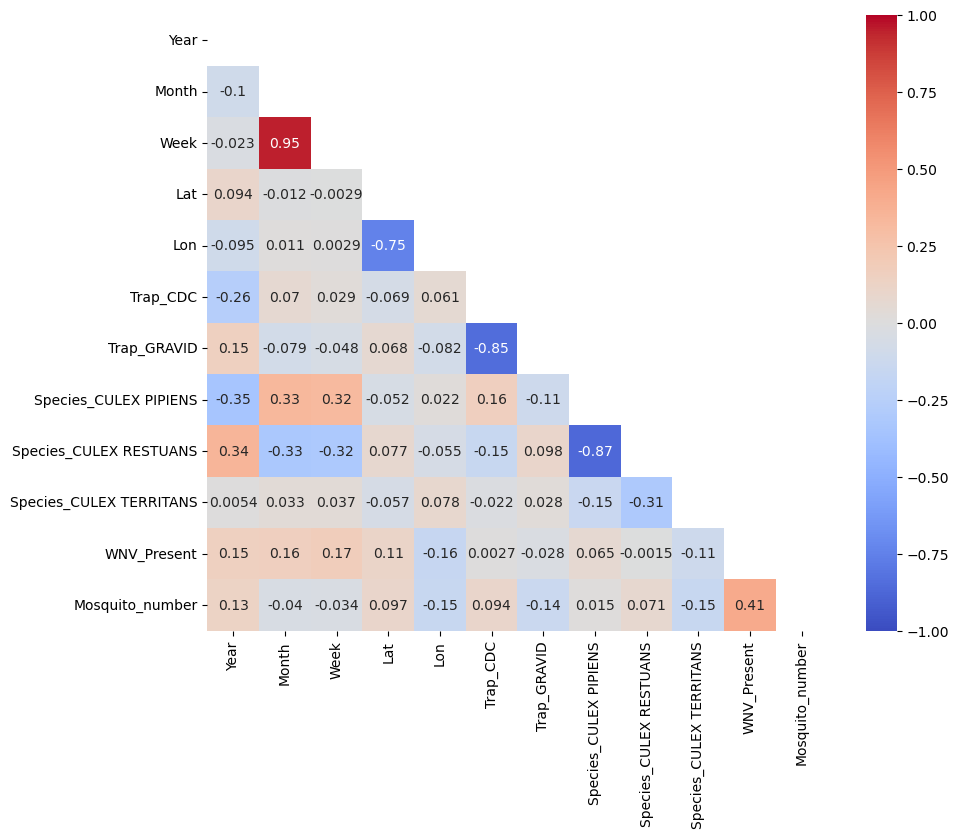

In [144]:
# Correlations with heatmap
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, mask=mask, cmap='coolwarm',vmin=-1, vmax=1, center=0)
plt.show()

In [145]:
# Correlations of independent variables and dependent variable
correlation_df = pearson_df(df, 'WNV_Present')
correlation_df

Correlations between data columns and WNV_Present:


,coefficient,p-value,p-value <= 0.05
Year,0.153848,2.477880e-98,True
Month,0.161300,5.046792e-108,True
Week,0.174230,5.545247e-126,True
Lat,0.110181,4.770598e-51,True
Lon,-0.163985,1.241906e-111,True
Trap_CDC,0.002735,7.099621e-01,False
Trap_GRAVID,-0.027514,1.824473e-04,True
Species_CULEX PIPIENS,0.065436,5.207896e-19,True
Species_CULEX RESTUANS,-0.001536,8.345755e-01,False
Species_CULEX TERRITANS,-0.111402,3.754047e-52,True


As can be seen, the same issue of correlation between independent variables exist here. So, the most correlated variables will be dropped as before.

In [146]:
# Dropping the most correlated columns
X.drop('Month', axis=1, inplace=True)
X.drop('Species_CULEX PIPIENS', axis=1, inplace=True)
X.drop('Trap_CDC', axis=1, inplace=True)
X.drop('Lat', axis=1, inplace=True)

And the correaltions between independent variables and dependent variables.

In [147]:
df_1 = pd.concat([X,y], axis=1)

In [148]:
correlation_df = pearson_df(df_1, 'WNV_Present')
correlation_df

Correlations between data columns and WNV_Present:


,coefficient,p-value,p-value <= 0.05
Year,0.153848,2.477880e-98,True
Week,0.174230,5.545247e-126,True
Lon,-0.163985,1.241906e-111,True
Trap_GRAVID,-0.027514,1.824473e-04,True
Species_CULEX RESTUANS,-0.001536,8.345755e-01,False
Species_CULEX TERRITANS,-0.111402,3.754047e-52,True
Mosquito_number,0.408023,0.000000e+00,True


The correlation between `Species_CULEX RESTUANS` and WNV_Present seems not significant. For now, it will be kept as an input to the model.

**Logistic Regression**

The logistic regression model based on the selected independent variables will be built.

In [149]:
# Adding the constant
X_const = sm.add_constant(X)

In [150]:
# Instantiate
model_log = sm.Logit(y, X_const)

# Fit
results = model_log.fit()

# Check
results.summary()

Optimization terminated successfully.
         Current function value: 0.406273
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV_Present   No. Observations:                18494
Model:                          Logit   Df Residuals:                    18486
Method:                           MLE   Df Model:                            7
Date:                Mon, 20 May 2024   Pseudo R-squ.:                  0.2213
Time:                        20:35:17   Log-Likelihood:                -7513.6
converged:                       True   LL-Null:                       -9649.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    -479.7678     22.473    -21.349      0.000    -523.814    -435.722
Year                        0.1066      0.007     16.272      0.000       0.094       0.119
Week                        0.1488      0.006     26.393      0.000       0.138       0.160
Lon                        -2.9442      0.214    -13.764      0.000      -3.363      -2.525
Trap_GRAVID                 0.2306      0.105      2.199      0.028       0.025       0.436
Species_CULEX RESTUANS     -0.2375      0.051     -4.674      0.000      -0.337      -0.138
Species_CULEX TERRITANS    -2.4722      0.274     -9.010      0.000      -3.010      -1.934
Mosquito_number             0.0655      0.001     45.081      0.000       0.063       0.068
===========================================================================================
"""

In [151]:
# Getting the model predictions as probabilities 
y_prob = results.predict(X_const)
y_prob

0        0.519441
1        0.398491
2        0.380799
3        0.390097
4        0.389372
           ...   
18490    0.260878
18491    0.277824
18492    0.415370
18493    0.776873
18494    0.273054
Length: 18494, dtype: float64

In [152]:
# Getting hard predictions (1 or 0) with threshold 0.5 
y_pred = np.where(y_prob >= 0.5, 1, 0)
y_pred

array([1, 0, 0, ..., 0, 1, 0])

In [153]:
# Calculating accuracy of the model
acc = (y_pred == y).mean()
print(f'Model accuracy = {acc}')

Model accuracy = 0.810262787931221


The accuracy of the model is 81.03% which is higher than the naive baseline model (78.4%), though not that much significant.

Let's see how the performance changes with different thresholds.

In [154]:
accuracy_list = []
threshold_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for threshold in threshold_list:
    y_pred = np.where(y_prob >= threshold, 1, 0)

    # Calculating accuracy 
    acc = 100*(y_pred == y).mean()

    # Add the accuracy to our dictionary
    accuracy_list.append(acc)

accuracy_df = pd.DataFrame(index=range(len(threshold_list)), 
                           data=zip(threshold_list, accuracy_list), 
                           columns=['Decision Threshold', 'Accuracy'])

accuracy_df

,Decision Threshold,Accuracy
0,0.1,56.164161
1,0.2,72.655997
2,0.3,78.614686
3,0.4,80.426084
4,0.5,81.026279
5,0.6,81.085758
6,0.7,80.609928
7,0.8,79.295988
8,0.9,78.420028


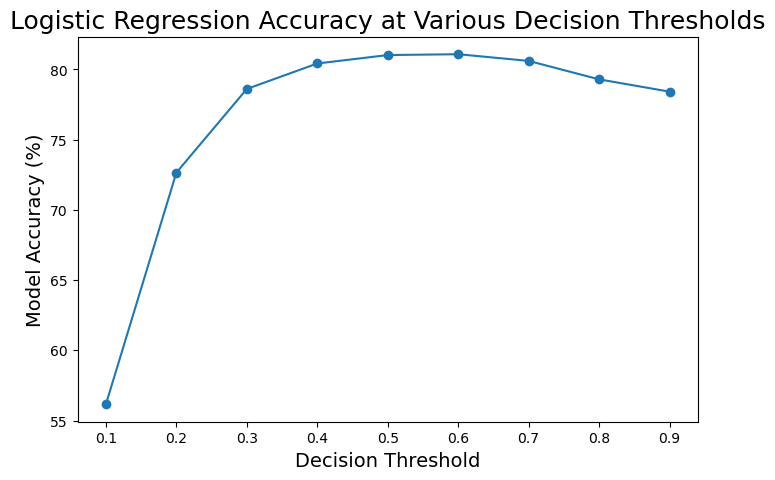

In [155]:
# Plotting the accuracy versus thresholds
plt.figure(figsize=(8,5))
plt.plot(accuracy_df['Decision Threshold'], accuracy_df['Accuracy'], marker='o')
plt.title('Logistic Regression Accuracy at Various Decision Thresholds', size=18)
plt.xlabel('Decision Threshold', size=14)
plt.ylabel('Model Accuracy (%)', size=14)
plt.yticks()
plt.show()

It can be seen that the highest accuracy is obtained by increasing the decision threshold to 0.6. This could be related to the imbalanced column of `WNV-Present`. Since most of the cases were negative, setting a low threshold would result in false positive results and lower performance overall.  

In [156]:
# Getting the regression coefficients from the params 
results.params

const                     -479.767821
Year                         0.106580
Week                         0.148759
Lon                         -2.944151
Trap_GRAVID                  0.230642
Species_CULEX RESTUANS      -0.237503
Species_CULEX TERRITANS     -2.472189
Mosquito_number              0.065472
dtype: float64

In [157]:
# Changing to a dataframe
results_df = pd.DataFrame(results.params, columns=['Coefficient'])
results_df

,Coefficient
const,-479.767821
Year,0.106580
Week,0.148759
Lon,-2.944151
Trap_GRAVID,0.230642
Species_CULEX RESTUANS,-0.237503
Species_CULEX TERRITANS,-2.472189
Mosquito_number,0.065472


In [158]:
# Calculaing the odds ratios
results_df['odds_ratio'] = np.exp(results_df['Coefficient'])

results_df.sort_values('odds_ratio', ascending=False)

,Coefficient,odds_ratio
Trap_GRAVID,0.230642,1.259408e+00
Week,0.148759,1.160393e+00
Year,0.106580,1.112467e+00
Mosquito_number,0.065472,1.067663e+00
Species_CULEX RESTUANS,-0.237503,7.885944e-01
Species_CULEX TERRITANS,-2.472189,8.439989e-02
Lon,-2.944151,5.264672e-02
const,-479.767821,4.359962e-209


As indicated in the table above, Trap_GRAVID, Week, Year, and Mosquito have the highest oddds ratios. It is interesting to see that the odds ratio for the two species fed into the model are lower than 1. This may indicate that the odds of getting positive WNV would be over 1 in the other two species.

Now, let's see what would have been the accuracy of the model with all the variables included without any feature selecting based on correlations. For this, the iterative process will be done.

In [159]:
df.head()

,Year,Month,Week,Lat,Lon,Trap_CDC,Trap_GRAVID,Species_CULEX PIPIENS,Species_CULEX RESTUANS,Species_CULEX TERRITANS,WNV_Present,Mosquito_number
0,2019,9,39,41.977738,-87.880969,0,1,0,1,0,0,2
1,2019,9,39,41.798211,-87.736925,0,1,0,1,0,0,1
2,2019,9,39,41.987245,-87.689417,0,1,0,1,0,0,2
3,2019,9,39,41.953664,-87.724987,0,1,0,1,0,0,1
4,2019,9,39,41.657069,-87.546049,0,1,0,1,0,0,9


In [160]:
X1 = df.drop('WNV_Present', axis=1)
y1 = df['WNV_Present']

In [161]:
# Adding the constant
X_const1 = sm.add_constant(X1)

In [162]:
# Instantiate
model_log1 = sm.Logit(y1, X_const1)

# Fit
results1 = model_log1.fit()

# Check
results1.summary()

Optimization terminated successfully.
         Current function value: 0.405465
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV_Present   No. Observations:                18494
Model:                          Logit   Df Residuals:                    18482
Method:                           MLE   Df Model:                           11
Date:                Mon, 20 May 2024   Pseudo R-squ.:                  0.2229
Time:                        20:36:30   Log-Likelihood:                -7498.7
converged:                       True   LL-Null:                       -9649.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    -519.0085     25.215    -20.583      0.000    -568.429    -469.588
Year                        0.1130      0.007     16.467      0.000       0.100       0.126
Month                       0.2202      0.069      3.192      0.001       0.085       0.355
Week                        0.1002      0.016      6.243      0.000       0.069       0.132
Lat                        -0.6595      0.287     -2.301      0.021      -1.221      -0.098
Lon                        -3.5432      0.335    -10.580      0.000      -4.200      -2.887
Trap_CDC                    0.2383      0.215      1.111      0.267      -0.182       0.659
Trap_GRAVID                 0.3940      0.171      2.304      0.021       0.059       0.729
Species_CULEX PIPIENS       0.9952      0.322      3.088      0.002       0.364       1.627
Species_CULEX RESTUANS      0.7450      0.322      2.316      0.021       0.115       1.375
Species_CULEX TERRITANS    -1.4949      0.420     -3.563      0.000      -2.317      -0.673
Mosquito_number             0.0651      0.001     44.694      0.000       0.062       0.068
===========================================================================================
"""

In [163]:
# Getting the model predictions as probabilities 
y_prob1 = results1.predict(X_const1)
y_prob1

0        0.513410
1        0.400497
2        0.347209
3        0.366277
4        0.385551
           ...   
18490    0.269924
18491    0.250980
18492    0.409218
18493    0.732726
18494    0.277027
Length: 18494, dtype: float64

In [164]:
y_pred1 = np.where(y_prob1 >= 0.5, 1, 0)
y_pred1

array([1, 0, 0, ..., 0, 1, 0])

In [165]:
# Calculating accuracy
acc1 = (y_pred1 == y1).mean()

print(f'Model accuracy = {acc1}')

Model accuracy = 0.811073861793014


The model accuracy has increased to 81.11% from 81.03%.

Let's remove the `Trap_CDC` which its p-value was high in the new model and check the performance again.

In [166]:
X2 = X1.drop('Trap_CDC', axis=1)
y2 = df['WNV_Present']

In [167]:
# Adding the constant
X_const2 = sm.add_constant(X2)

In [168]:
# Instantiate
model_log2 = sm.Logit(y2, X_const2)

# Fit
results2 = model_log2.fit()

# Check
results2.summary()

Optimization terminated successfully.
         Current function value: 0.405498
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV_Present   No. Observations:                18494
Model:                          Logit   Df Residuals:                    18483
Method:                           MLE   Df Model:                           10
Date:                Mon, 20 May 2024   Pseudo R-squ.:                  0.2228
Time:                        20:36:57   Log-Likelihood:                -7499.3
converged:                       True   LL-Null:                       -9649.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    -516.3808     25.099    -20.574      0.000    -565.574    -467.188
Year                        0.1113      0.007     16.683      0.000       0.098       0.124
Month                       0.2223      0.069      3.224      0.001       0.087       0.357
Week                        0.0994      0.016      6.202      0.000       0.068       0.131
Lat                        -0.6793      0.286     -2.374      0.018      -1.240      -0.119
Lon                        -3.5653      0.334    -10.661      0.000      -4.221      -2.910
Trap_GRAVID                 0.2449      0.105      2.328      0.020       0.039       0.451
Species_CULEX PIPIENS       0.9986      0.323      3.095      0.002       0.366       1.631
Species_CULEX RESTUANS      0.7449      0.322      2.313      0.021       0.114       1.376
Species_CULEX TERRITANS    -1.4919      0.420     -3.554      0.000      -2.315      -0.669
Mosquito_number             0.0651      0.001     44.702      0.000       0.062       0.068
===========================================================================================
"""

In [169]:
# Getting the model predictions 
y_prob2 = results2.predict(X_const2)

y_prob2

0        0.510382
1        0.397672
2        0.343470
3        0.362776
4        0.382473
           ...   
18490    0.269116
18491    0.253279
18492    0.408262
18493    0.759280
18494    0.276484
Length: 18494, dtype: float64

In [170]:
y_pred2 = np.where(y_prob2 >= 0.5, 1, 0)

y_pred2

array([1, 0, 0, ..., 0, 1, 0])

In [171]:
# Calculating accuracy 
acc2 = (y_pred2 == y2).mean()

print(f'Model accuracy = {acc2}')

Model accuracy = 0.8110197902022277


The model accuracy has remained around 81.10%. It can be said that the first model obtained with accuracy of 81.03% can be selected as the best model since it has similar performance to the other two but it is much simpler with lower number of variables.

# Conclusion

In this notebook, linear regression and logistic regression modelling approaches were applied to the mosquito dataset of Chicago to predict the number of mosquitoes caught and WNV presence. It was seen that linear regression model was not adequate enough to represent the variations in the response variable (number of mosquitoes caught). The logistic regression performed better with an accuracy of 81.03%. However it should be mentioned that a naive model could have an accuracy of 78.4%. 